# 04_영화진흥원 OpenAPI

## OpenAPI란?

누구나 사용할 수 있도록 공개된 API

> **API**(Application Programming Interface) : 프로그램에서 데이터를 주고 받기 위한 방법

대부분의 OpenAPI는 데이터 교환 형식으로 JSON을 사용한다.

## 영화진흥위원회 OpenAPI 연동

[http://www.kobis.or.kr/kobisopenapi](http://www.kobis.or.kr/kobisopenapi)에 회원가입 후 키를 발급받아야 함

## #01. 기본 준비 단계

### 1) 필요한 패키지 가져오기

In [1]:
import requests
import json
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot

### 2) API 키 준비하기

In [2]:
api_key = "62aa093993a32d3280249fc8417a88cb"

### 3) 세션 생성하기

In [3]:
user_agent = "Mozilla/5.0 (Linux; Android 5.0; SM-G900P Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Mobile Safari/537.36"
# 세션 만들어서 생성을 함
session = requests.Session()
session.headers.update({'User-agent':user_agent, 'referer':None})

## #02. 특정 날짜에 대한 박스오피스 관람객 수

영화진흥위원회의 OpenAPI는 오늘을 기준으로 `하루 전날` 까지의 데이터를 제공한다.

### 1) 접속 주소 준비하기 

#### 변수가 치환될 주소 템플릿주소 템플릿

In [8]:
url_tpl = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={date}"

#### 조회날짜 문자열 만들기
> 여기서는 어제 날짜

In [9]:
today = dt.datetime.now()                     # 오늘 날짜 
delta = dt.timedelta(days = -1)               # 하루 전을 의미하는 timedelta 객체
yesterday = today + delta                     # 오늘날짜와 timedelta 연산
yesterday_str = yesterday.strftime("%Y%m%d")  # yyyymmdd 형식 문자열로 변환
yesterday_str

'20240523'

#### 최종 접속 주소 확인

In [11]:
api_url = url_tpl.format(key=api_key, date=yesterday_str)
api_url

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=62aa093993a32d3280249fc8417a88cb&targetDt=20240523'

### 2) API 를 통한 JSON 데이터 가져오기

#### OpenAPI 를 통한 JSON 가져오기

In [12]:
r = session.get(api_url)

if r.status_code != 200 :
    print('실패')
    quit()

r.encoding = 'utf-8'
r.text

'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20240523~20240523","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20236653","movieNm":"퓨리오사: 매드맥스 사가","openDt":"2024-05-22","salesAmt":"592332539","salesShare":"39.2","salesInten":"-190734718","salesChange":"-24.4","salesAcc":"1406401796","audiCnt":"57131","audiInten":"-18242","audiChange":"-24.2","audiAcc":"135394","scrnCnt":"1427","showCnt":"4901"},{"rnum":"2","rank":"2","rankInten":"1","rankOldAndNew":"OLD","movieCd":"20228797","movieNm":"범죄도시4","openDt":"2024-04-24","salesAmt":"318980702","salesShare":"21.1","salesInten":"-40177691","salesChange":"-11.2","salesAcc":"103498877498","audiCnt":"33746","audiInten":"-4494","audiChange":"-11.8","audiAcc":"10826932","scrnCnt":"954","showCnt":"3125"},{"rnum":"3","rank":"3","rankInten":"1","rankOldAndNew":"OLD","movieCd":"20203557","movieNm":"그녀가 죽었다","openDt":"2024-05-15","salesAmt":"239389639","salesShare":"15.8","salesInten":"-98176

####
###  3) JSON 을 딕셔너리로 변환시키자

In [13]:
dic = json.loads(r.text)
dic

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스',
  'showRange': '20240523~20240523',
  'dailyBoxOfficeList': [{'rnum': '1',
    'rank': '1',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20236653',
    'movieNm': '퓨리오사: 매드맥스 사가',
    'openDt': '2024-05-22',
    'salesAmt': '592332539',
    'salesShare': '39.2',
    'salesInten': '-190734718',
    'salesChange': '-24.4',
    'salesAcc': '1406401796',
    'audiCnt': '57131',
    'audiInten': '-18242',
    'audiChange': '-24.2',
    'audiAcc': '135394',
    'scrnCnt': '1427',
    'showCnt': '4901'},
   {'rnum': '2',
    'rank': '2',
    'rankInten': '1',
    'rankOldAndNew': 'OLD',
    'movieCd': '20228797',
    'movieNm': '범죄도시4',
    'openDt': '2024-04-24',
    'salesAmt': '318980702',
    'salesShare': '21.1',
    'salesInten': '-40177691',
    'salesChange': '-11.2',
    'salesAcc': '103498877498',
    'audiCnt': '33746',
    'audiInten': '-4494',
    'audiChange': '-11.8',
    'audiAcc': '10826932',
    'scrnCnt'

####
### 4) 딕셔너리를 데이터프레임으로 변환

In [14]:
df = DataFrame(dic['boxOfficeResult']['dailyBoxOfficeList'])
df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20236653,퓨리오사: 매드맥스 사가,2024-05-22,592332539,39.2,-190734718,-24.4,1406401796,57131,-18242,-24.2,135394,1427,4901
1,2,2,1,OLD,20228797,범죄도시4,2024-04-24,318980702,21.1,-40177691,-11.2,103498877498,33746,-4494,-11.8,10826932,954,3125
2,3,3,1,OLD,20203557,그녀가 죽었다,2024-05-15,239389639,15.8,-9817688,-3.9,4848748646,25349,-1048,-4,508559,844,2304
3,4,4,1,OLD,20249416,청춘 18X2 너에게로 이어지는 길,2024-05-22,77044112,5.1,-59924995,-43.8,249048519,8496,-6699,-44.1,27356,602,1649
4,5,5,-3,OLD,20249507,극장판 하이큐!! 쓰레기장의 결전,2024-05-15,82504613,5.5,-295902369,-78.2,4412697334,8492,-30099,-78,425378,591,1101
5,6,6,0,OLD,20247783,혹성탈출: 새로운 시대,2024-05-08,67257998,4.4,-3917470,-5.5,8246452623,7079,-442,-5.9,811240,611,995
6,7,7,0,OLD,20249305,가필드 더 무비,2024-05-15,19636478,1.3,-11697739,-37.3,1876830791,2253,-1364,-37.7,206540,240,262
7,8,8,0,OLD,20236674,이프: 상상의 친구,2024-05-15,11330917,0.7,-3119583,-21.6,754856195,1385,-317,-18.6,83870,156,165
8,9,9,0,NEW,20234045,설계자,2024-05-29,12249000,0.8,12249000,100,15993000,1361,1361,100,1777,4,5
9,10,10,-1,OLD,20249317,악마와의 토크쇼,2024-05-08,12267500,0.8,588800,5,802937300,1259,-194,-13.4,83316,96,116


####
### 5) 데이터 전처리

In [15]:
t_df = df.filter(['movieNm','audiCnt'])
t_df

,movieNm,audiCnt
0,퓨리오사: 매드맥스 사가,57131
1,범죄도시4,33746
2,그녀가 죽었다,25349
3,청춘 18X2 너에게로 이어지는 길,8496
4,극장판 하이큐!! 쓰레기장의 결전,8492
5,혹성탈출: 새로운 시대,7079
6,가필드 더 무비,2253
7,이프: 상상의 친구,1385
8,설계자,1361
9,악마와의 토크쇼,1259


In [18]:
# 영화제목을 인덱스로 지정
name_dic = {}
for i, v in enumerate(list(t_df['movieNm'])) :
    name_dic[i] = v

r_df = t_df.rename(index=name_dic, columns={'audiCnt':'관객수'})
r_df.drop('movieNm', axis=1, inplace=True)
r_df

,관객수
퓨리오사: 매드맥스 사가,57131
범죄도시4,33746
그녀가 죽었다,25349
청춘 18X2 너에게로 이어지는 길,8496
극장판 하이큐!! 쓰레기장의 결전,8492
혹성탈출: 새로운 시대,7079
가필드 더 무비,2253
이프: 상상의 친구,1385
설계자,1361
악마와의 토크쇼,1259


####
### 6) 관람객 자료형 확인

In [19]:
r_df['관객수']

퓨리오사: 매드맥스 사가          57131
범죄도시4                  33746
그녀가 죽었다                25349
청춘 18X2 너에게로 이어지는 길     8496
극장판 하이큐!! 쓰레기장의 결전      8492
혹성탈출: 새로운 시대            7079
가필드 더 무비                2253
이프: 상상의 친구              1385
설계자                     1361
악마와의 토크쇼                1259
Name: 관객수, dtype: object

### => dtype: object 이면 string 이다.

####
### 7) 관람객 타입을 숫자형식으로 변환

In [20]:
r_df['관객수'] = r_df['관객수'].apply(pd.to_numeric)
r_df['관객수']

퓨리오사: 매드맥스 사가          57131
범죄도시4                  33746
그녀가 죽었다                25349
청춘 18X2 너에게로 이어지는 길     8496
극장판 하이큐!! 쓰레기장의 결전      8492
혹성탈출: 새로운 시대            7079
가필드 더 무비                2253
이프: 상상의 친구              1385
설계자                     1361
악마와의 토크쇼                1259
Name: 관객수, dtype: int64

### => int 로 바뀐다

#### 
### 8) 시각화

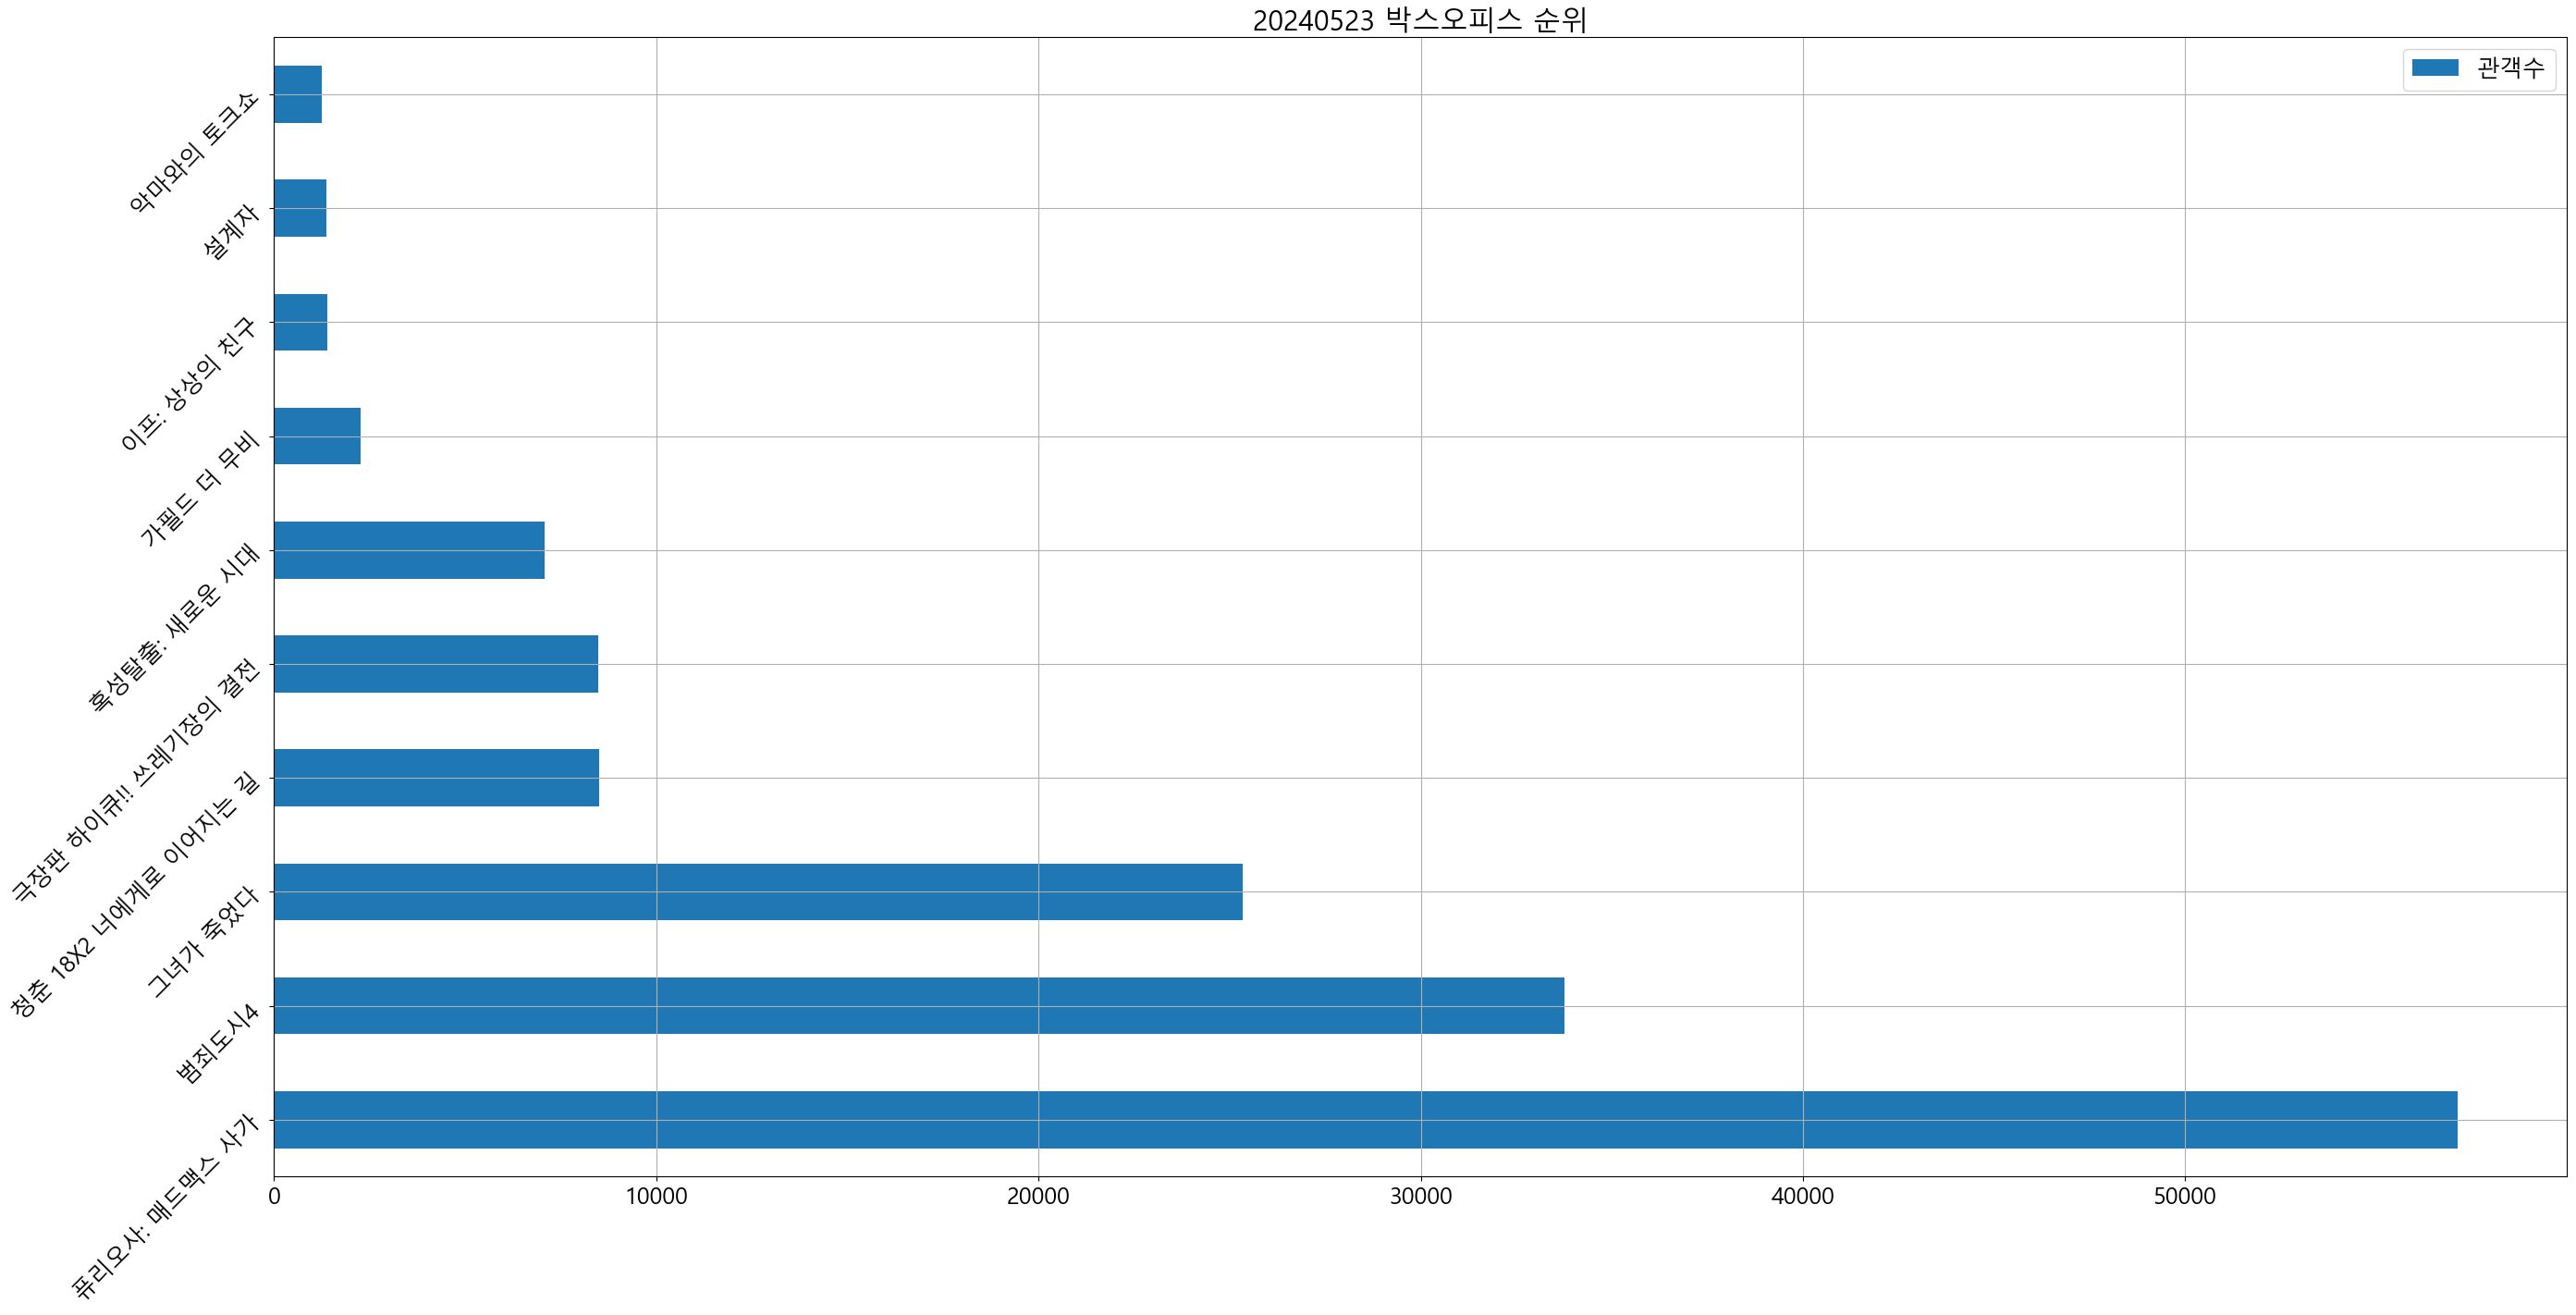

In [22]:
# 그래프 만들기
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (32, 16)

# 전체 컬럼에 대한 시각화
r_df.plot.barh(rot=45)
pyplot.grid()
pyplot.title("%s 박스오피스 순위" % yesterday_str)
pyplot.legend()
pyplot.show()
pyplot.close()

####
### 9) 영화별 1주일 간의 관람객 수 변동 현황 시각화

>URL 에 접속하는 연동 부분을 하나의 블록으로 묶고, 날짜를 변경해서 1주일간의 변화량을 확인한다.


#### a) 반복문을 이용해서 1주일치 데이터 수집하기

In [30]:
# 반복문을 수행하면서 생성되는 데이터프레임을 누적할 빈 데이터프레임 준비
c_df = DataFrame()


# 일주일 간의 기간을 위한 반복문
for i in range(-7, 0) :
    today = dt.datetime.now()                     # 오늘 날짜 
    delta = dt.timedelta(days = i)                # 하루 전을 의미하는 timedelta 객체
    yesterday = today + delta                     # 오늘날짜와 timedelta 연산
    yesterday_str = yesterday.strftime("%Y%m%d")  # yyyymmdd 형식 문자열로 변환
    #print(yesterday_str)

    # 최종접속 주소 
    api_url = url_tpl.format(key=api_key, date=yesterday_str)

    # API 를 통한 JSON 데이터 가져오기
    r = session.get(api_url)

    # 오류발생하면 멈추는게 아니라, 다음날로 진행
    if r.status_code != 200 :
        print('실패')
        continue

    r.encoding = 'utf-8'

    # 딕셔너리로 변환
    dic = json.loads(r.text)

    # 데이터프레임으로 변환
    df = DataFrame(dic['boxOfficeResult']['dailyBoxOfficeList'])

    # 사용할 컬럼만 추출
    t_df = df.filter(['movieNm','audiCnt'])

    # 영화제목을 인덱스로 지정하기
    name_dic = {}
    for i, v in enumerate(list(t_df['movieNm'])) :
        name_dic[i] = v
    
    # 인덱스 이름변경, 컬럼이름 변경
    r_df = t_df.rename(index=name_dic, columns={'audiCnt': yesterday_str})
    r_df.drop('movieNm', axis=1, inplace=True)
    #print(r_df)

    # 관람객 컬럼의 타입을 숫자로 변경
    r_df[yesterday_str] = r_df[yesterday_str].apply(pd.to_numeric)

    ## 영화이름이 동일한 데이터는 누적
    ## how 값을 outer 로 지정하여 중복되지 않은 인덱스명도 누락되지 않도록 한다.
    c_df = pd.merge(c_df, r_df, left_index=True, right_index=True, how='outer')

print(c_df)

                          20240517  20240518  20240519  20240520  20240521  \
가필드 더 무비                    6356.0   37822.0   37877.0    4080.0    5093.0   
그녀가 죽었다                    49549.0   98654.0   93532.0   33577.0   32670.0   
극장판 하이큐!! 쓰레기장의 결전         31976.0   60745.0   51631.0   15023.0   14986.0   
남은 인생 10년                   2995.0    5601.0    6306.0    1653.0    1645.0   
범죄도시4                      91040.0  180564.0  147135.0   51464.0   43760.0   
별처럼 빛나는 너에게 더무비-일섬일섬량성성        NaN       NaN       NaN       NaN       NaN   
설계자                            NaN       NaN       NaN       NaN       NaN   
쇼생크 탈출                      1139.0    1930.0       NaN     726.0     797.0   
시민덕희                           NaN       NaN       NaN       NaN     751.0   
악마와의 토크쇼                    3508.0    5797.0    3770.0    2436.0    2249.0   
애비게일                        1146.0       NaN       NaN       NaN       NaN   
이프: 상상의 친구                  4885.0   14027.0   14628.0    2671.0

In [33]:
# 결측치를 0 으로 대체
f_df = c_df.fillna(0)
f_df

,20240517,20240518,20240519,20240520,20240521,20240522,20240523
가필드 더 무비,6356.0,37822.0,37877.0,4080.0,5093.0,3617.0,2253.0
그녀가 죽었다,49549.0,98654.0,93532.0,33577.0,32670.0,26397.0,25349.0
극장판 하이큐!! 쓰레기장의 결전,31976.0,60745.0,51631.0,15023.0,14986.0,38591.0,8492.0
남은 인생 10년,2995.0,5601.0,6306.0,1653.0,1645.0,0.0,0.0
범죄도시4,91040.0,180564.0,147135.0,51464.0,43760.0,38240.0,33746.0
별처럼 빛나는 너에게 더무비-일섬일섬량성성,0.0,0.0,0.0,0.0,0.0,1078.0,0.0
설계자,0.0,0.0,0.0,0.0,0.0,0.0,1361.0
쇼생크 탈출,1139.0,1930.0,0.0,726.0,797.0,0.0,0.0
시민덕희,0.0,0.0,0.0,0.0,751.0,0.0,0.0
악마와의 토크쇼,3508.0,5797.0,3770.0,2436.0,2249.0,1453.0,1259.0


### 날짜별 영화 관람객수 

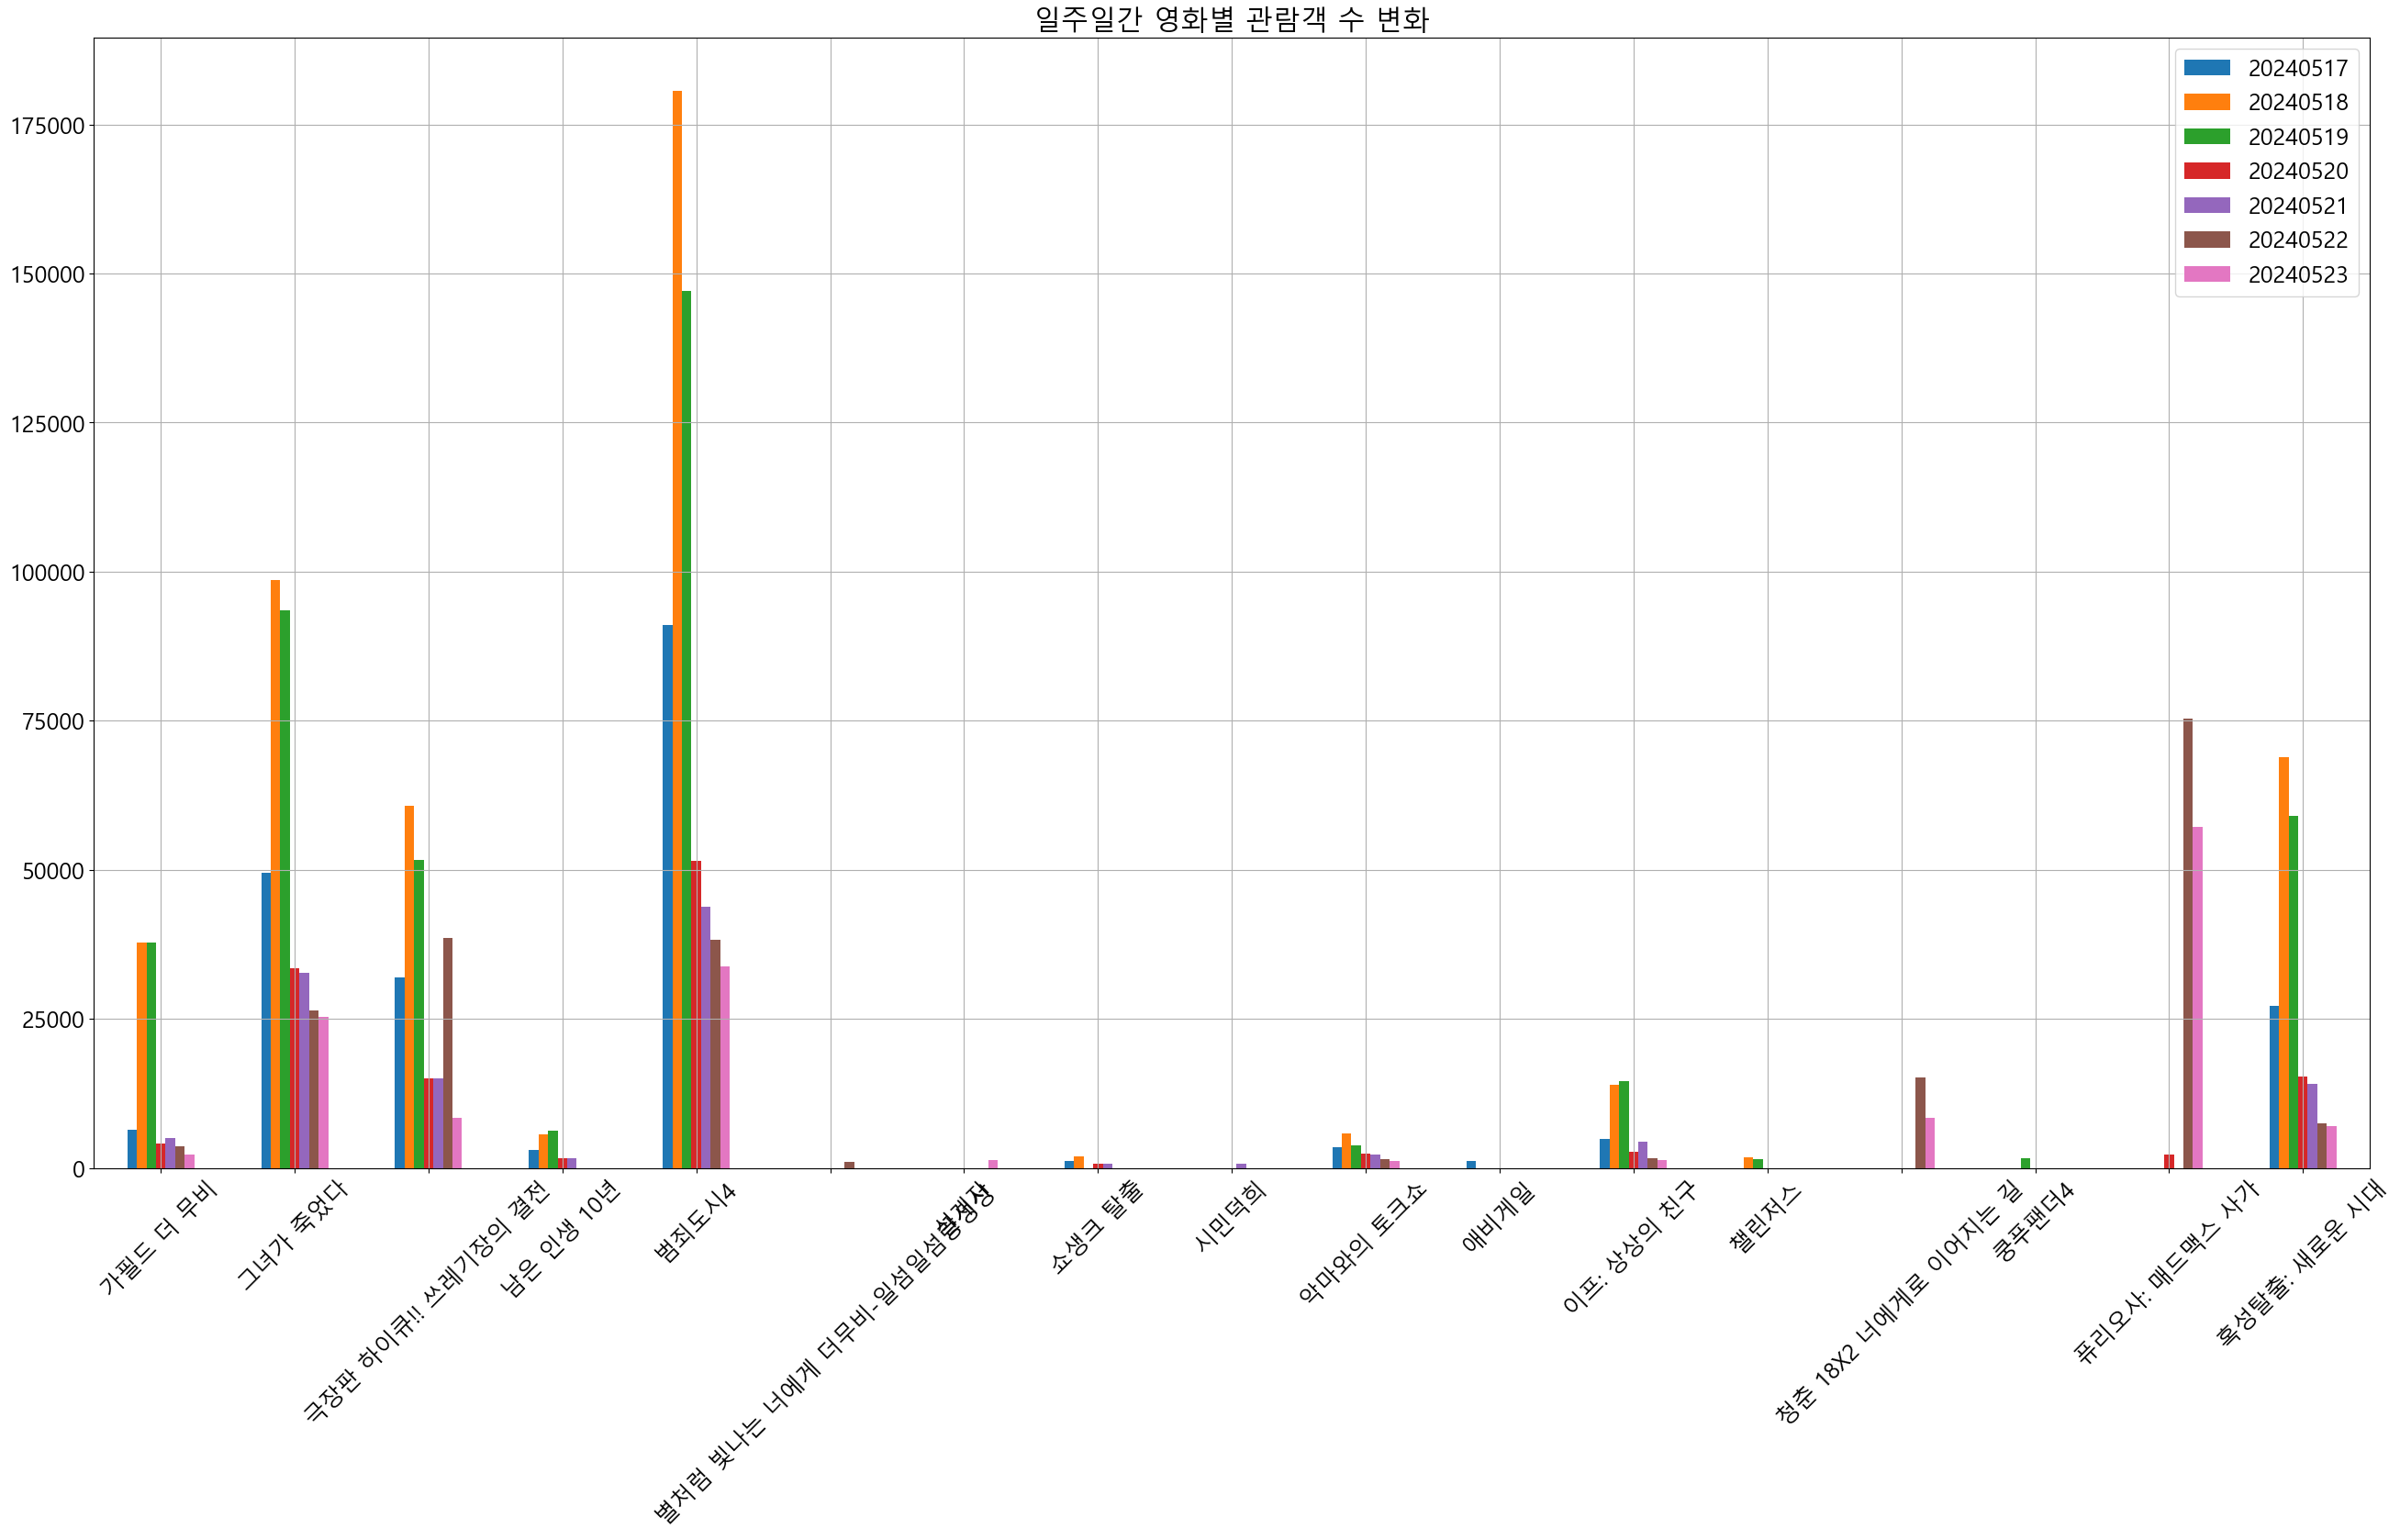

In [41]:
# 그래프 만들기
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (32, 16)

# 전체 컬럼에 대한 시각화 (각 영화별 막대그래프)
f_df.plot.bar(rot=45)
pyplot.grid()
pyplot.title("일주일간 영화별 관람객 수 변화")
pyplot.legend()
pyplot.show()
pyplot.close()

#### b) 시각화
> 시간에 따른 데이터의 변화를 표현하기 위해서는 선그래프(시계열그래프) 사용

### 시간별 관람객수

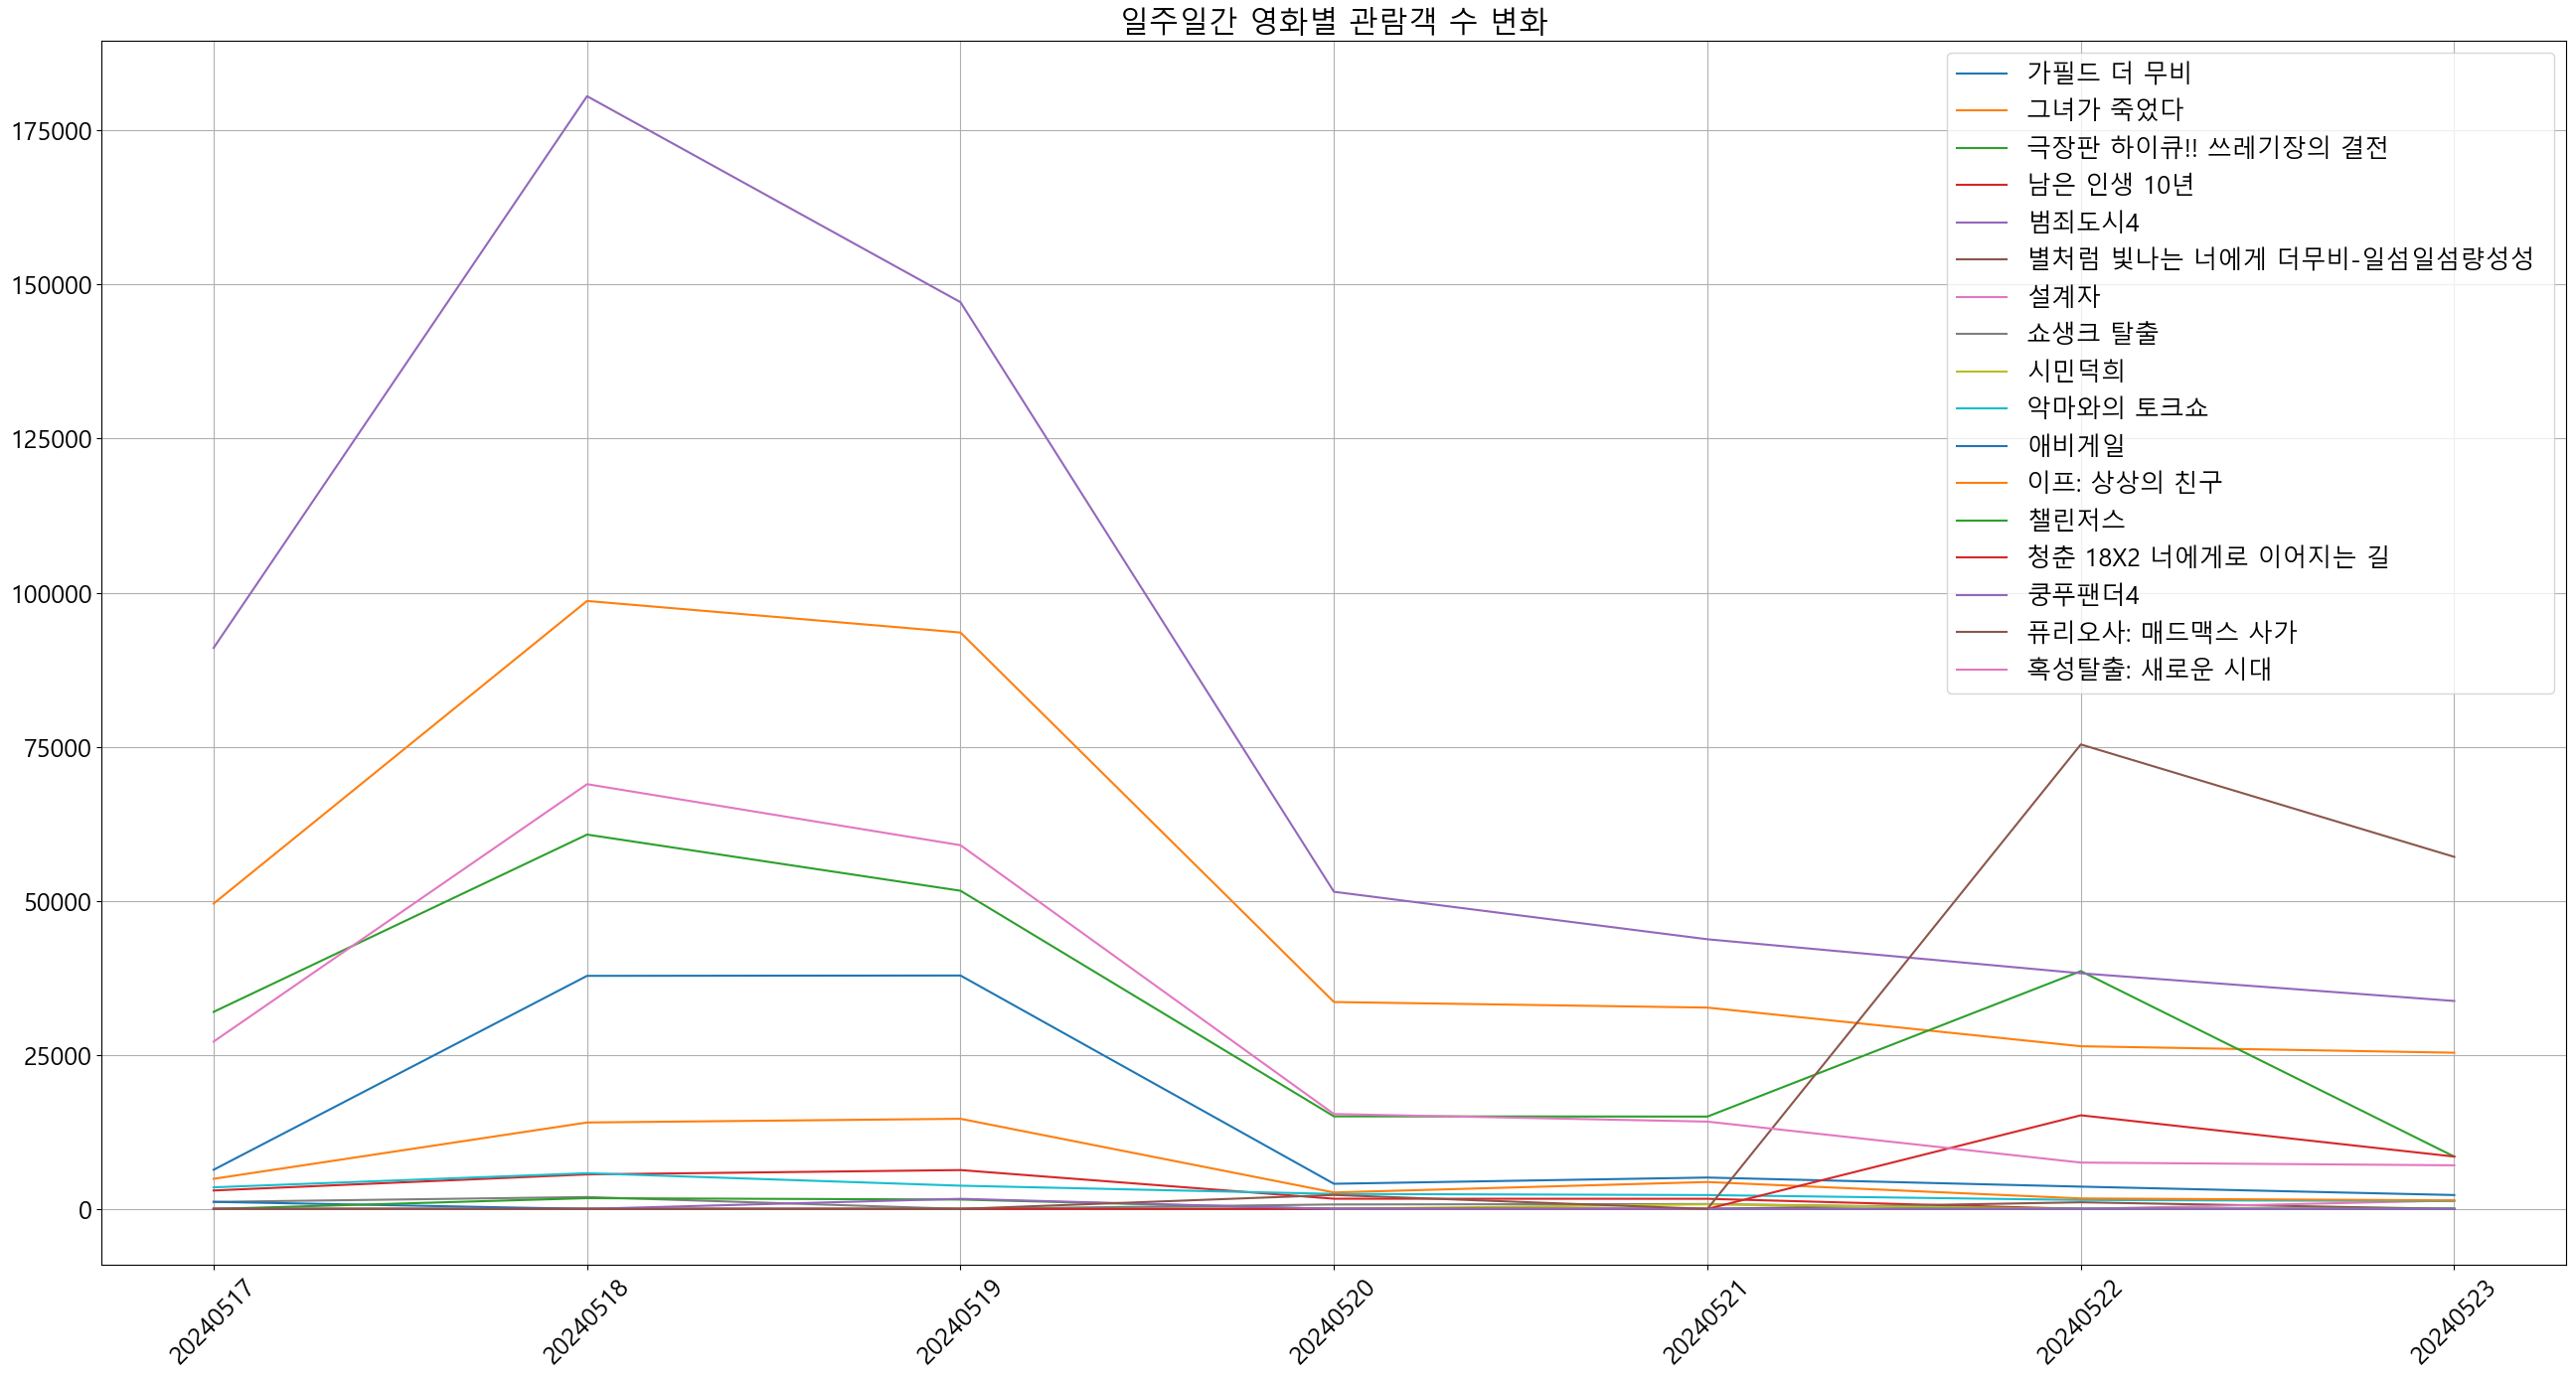

In [40]:
# 그래프 만들기
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (32, 16)

# 전체 컬럼에 대한 시각화 (시계열 그래프 - 선그래프)
# x, y 축 을 변경하면 전치행렬 사용
f_df.T.plot(rot=45)
pyplot.grid()
pyplot.title("일주일간 영화별 관람객 수 변화")
pyplot.legend()
pyplot.show()
pyplot.close()